# Lecure 7.2 Even more data analysis with pandas

Lots more coding today, with a bit of discussion.

Homework is to do some analysis of the movies dataset and present your results on Tuesday

# 1. Warm-up

Learning objectives: modifying plots by looking at the documentation and examples, pandas mastery

For this exercise we are using the durations data TED Talk database from last time

### 1.1 
Create the pandas film_datetime column used previously. Save the resulting pandas dataframe as a new file with a different name. Load this new file into pandas to check that your new column is there.

In [218]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [219]:
# read in oringinal ted file
ted = pd.read_csv('ted.csv')

In [220]:
# to datetime
dur_time = pd.to_datetime(ted.duration, unit='s')
ted['film_date'] = pd.to_datetime(ted.film_date, unit='s')
ted['published_date'] = pd.to_datetime(ted.published_date, unit='s')

In [221]:
# exporting film_date column only
ted_film_date = ted['film_date']
ted_film_date.to_excel("ted_film_dates.xlsx")

### 1.2
Sort the durations data by month and make a histogram of the number of talks in a given month. Note that the default of 10 bins does not work well for this. How well does using 12 bins work?

How many talks by months and plot that

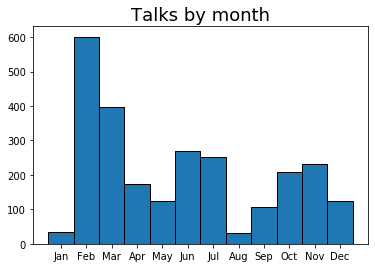

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [222]:
result = ted_film_date.dt.month
result = result.sort_values()

fig, ax = plt.subplots()
bins = np.arange(1,14)
ax.hist(result, bins = bins, edgecolor="k", align='left')
ax.set_xticks(bins[:-1])
ax.set_xticklabels([datetime.date(1900,i,1).strftime('%b') for i in bins[:-1]] )
plt.title("Talks by month", fontsize=18)
plt.show()
bins

### 1.3
Look at the documentation for plotting histograms (google it). Define an array that will give the bins you need to make a bin for each month with sensible endpoints, using one of the numpy functions we discussed previously. What should your bin edges be? 

In [223]:
# see above

### 1.4
Label your x-axis with month labels 

In [224]:
#see above

# 2. Discussion

## 2.1 Semiar homework from last week
Some potential questions for discussion:
- What makes a good talk? 
- Does the rubric capture what makes a good talk?
- How were the figures in the talk formatted?
- How was this different than the figures in the paper?

## 2.2 Pandas analysis by students

# 3. Exercises

Learning objectives: pandas mastery, writing data files with pandas, data analysis: asking research questions, doing the analysis, and presenting your results

### 3.1 
From the movies spreadsheet you used last week (Lec 6.2), make a histogram of all the years movies were made, combining the data in three sheets. In one plot, make two subplots, one with bins (bars) of 10 years width, and one with bins of 20 years width. Note this does not mean 10 and 20 bins!


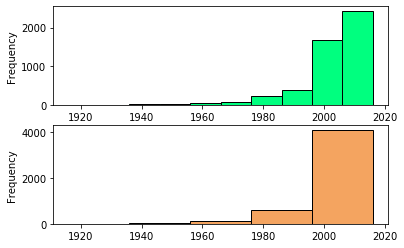

In [225]:
# import and inspect movies and Movie.Years
movies = pd.read_excel("movies_full.xlsx")
movie_years = movies.Year

bins10 = np.arange(1916,2020,10)
bins20 = np.arange(1916,2020,20)

plt.subplot(2,1,1) 
movie_years.plot(kind='hist', bins=bins10, color='springgreen', edgecolor='black')
plt.subplot(2,1,2)
movie_years.plot(kind='hist', bins=bins20, color='sandybrown', edgecolor='black')

#ax1.set_xticks(bins[:-1])
#ax1.set_xticklabels([datetime.date(1900,i,1).strftime('%b') for i in bins[:-1]] )


In [226]:
pd.to_datetime(movie_years, unit='s')
movie_years.max()

2016.0

### 3.2
Label your axes and change the color of the bars in each plot. Make the bars have black outlines.

In [227]:
# see above

### 3.3
Interpret your results. How does changing the number of bins give you a different perspective on the data? Is the dropoff over time an artifact of the dataset or is it realistic?

In [228]:
# more bins give us a finer resolution of data and thus more detail. The data does not dropoff it increases. 

### 3.4 
What is the lowest IMDB score?

In [229]:
IMDB = movies['IMDB Score']
IMDB.min()

1.6

### 3.5 
Find the names of all the movies with an IMDB score below 5, put these in a new pandas dataframe along with their IMDB scores. Write this dataframe to a new file. Check that your file works by loading it back in again.

In [230]:
# get movies with less than 5 imdb score
movies_less5 = movies[IMDB < 5]

# isolate Title and IMDB Score columns
movies_5 = movies_less5[['Title','IMDB Score']]

# create excel output file
movies_5.to_excel("movies_less_5IMDB.xlsx")

In [231]:
movies_5.head()

,Title,IMDB Score
1,Over the Hill to the Poorhouse,4.8
86,The Brain That Wouldn't Die,4.1
144,The Stewardesses,4.0
219,Exorcist II: The Heretic,3.7
229,Alien Zone,4.1


### 3.6-9 (and homework)

Now get creative. Define three research questions for this movies data set and do analysis to answer those quesitons. You will present this analysis, along with your data analysis methods, to the class on Tuesday. Showing this analysis in a notebook is fine, but make sure your plots are formatted for presentation.

In [234]:
# make columns object for correlation colculations
movies_corr.head()

# Question 1
### How did countries rank in terms of total number of movies?


In [275]:
# inspect country data
movies.Language.unique()
movies.Country.unique()

array(['USA', 'Germany', 'Japan', 'Denmark', 'UK', 'Italy', 'France',
       'West Germany', 'Sweden', 'Soviet Union', 'Iran', 'Australia',
       'Libya', 'Canada', 'South Korea', 'Brazil', 'Netherlands', 'China',
       'Norway', 'Switzerland', 'New Zealand', 'Hong Kong', 'Peru',
       'India', 'Spain', 'Aruba', 'Mexico', 'Czech Republic', 'Taiwan',
       'Argentina', 'Thailand', 'New Line', 'Afghanistan', 'Russia',
       'Ireland', 'Colombia', 'Romania', 'Philippines', 'Hungary',
       'Cameroon', 'South Africa', 'Israel', 'Poland', 'Turkey',
       'Slovakia', 'Greece', 'Iceland', 'Official site', 'Georgia',
       'Finland', 'Belgium', 'Indonesia', 'Nigeria', 'Dominican Republic',
       'United Arab Emirates', 'Egypt', 'Bulgaria', nan, 'Bahamas',
       'Cambodia', 'Kyrgyzstan', 'Kenya', 'Slovenia', 'Pakistan', 'Chile',
       'Panama'], dtype=object)

# Question 2
### Is data related?

In [279]:
# choose which columns to include in correlation analysis
movies_corr = movies[['Year','Duration', 'Aspect Ratio','Budget','Facebook Likes - Actor 1', 'Facebook Likes - Actor 2','Facebook Likes - Actor 3','Facebook Likes - cast Total', 'Facebook likes - Movie','User Votes','Reviews by Users','IMDB Score']]

# inspect data types of columns
movies.dtypes

# make data all one data type (float64)
movies_corr = movies_corr.astype('float64')

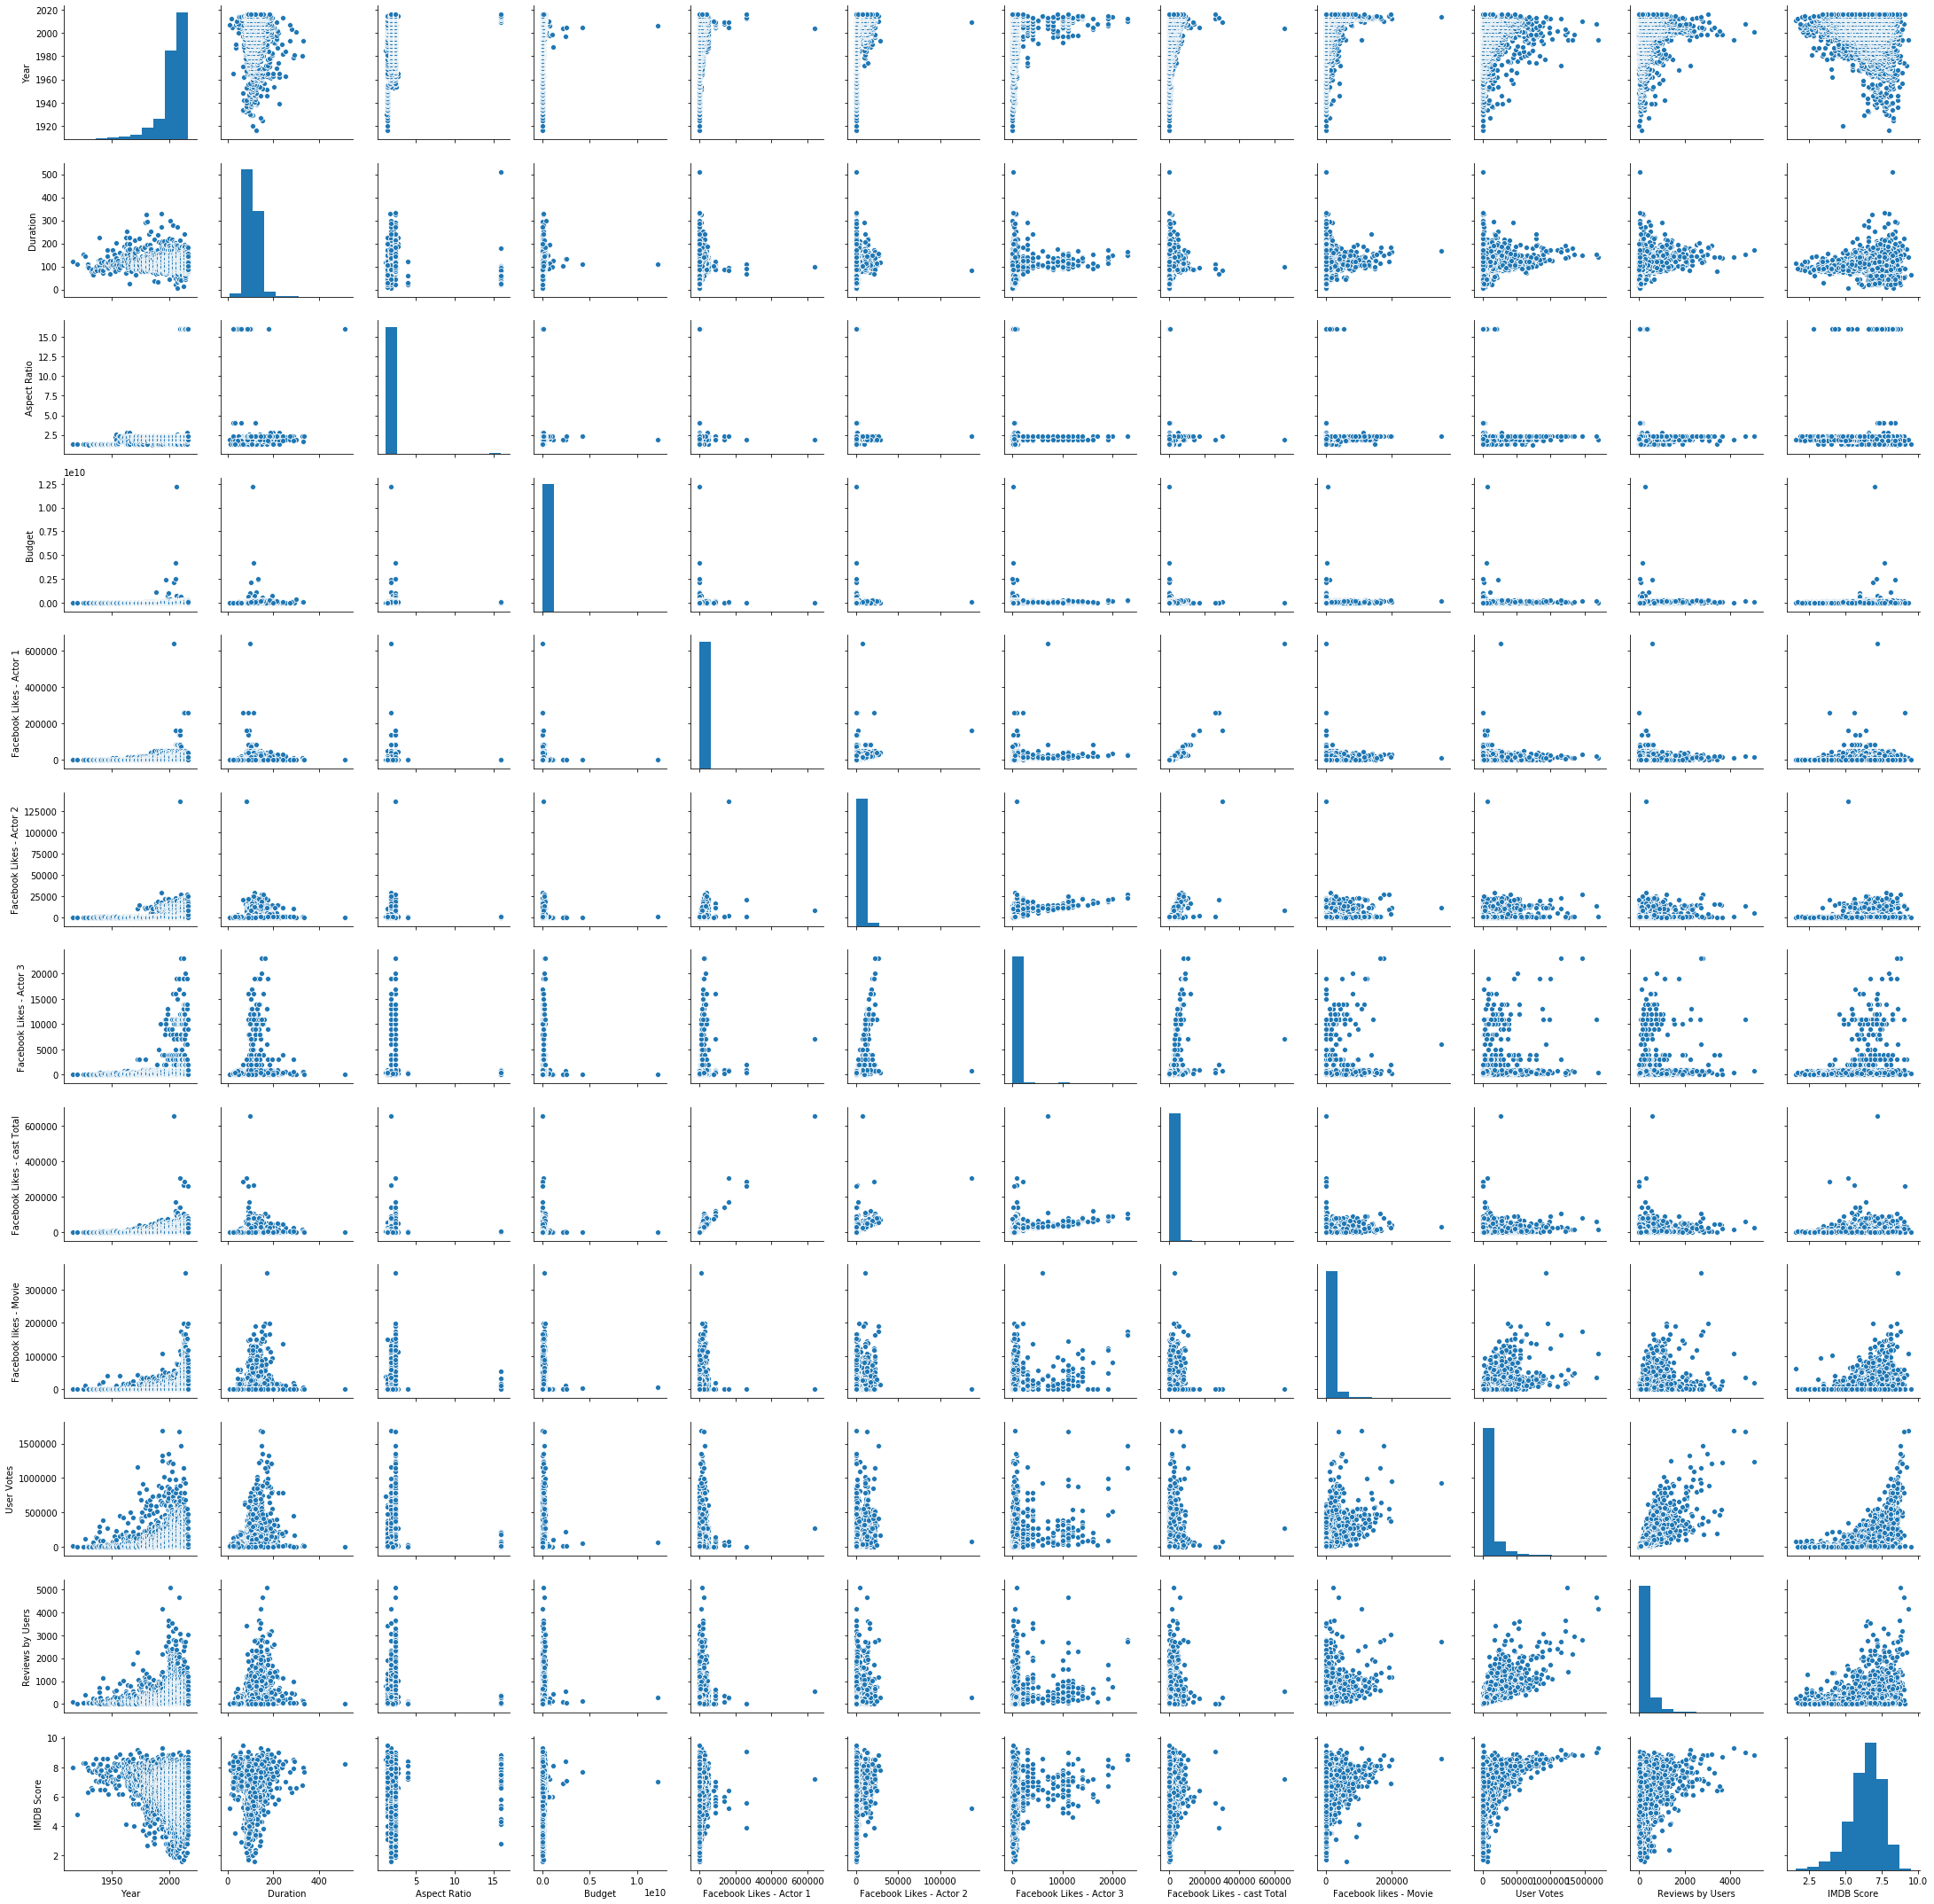

In [246]:
# create correlation plot matrix of each numeric variable
sns.pairplot(movies_corr.loc[:,movies_corr.dtypes=='float64'])

In [250]:
# create correlation columns names
mov_col = movies_corr.columns

# create correlation matrix
d = movies_corr[mov_col]
d.corr()

,Year,Duration,Aspect Ratio,Budget,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,User Votes,Reviews by Users,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.086873,0.101890,0.096137,0.109971,0.218678,0.007397,-0.003147,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.088449,0.131673,0.123558,0.123074,0.196605,0.314765,0.328403,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,-0.014761,-0.024719,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.022639,0.044236,0.047451,0.036557,0.062039,0.079621,0.084292,0.030688
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,1.000000,0.390466,0.249927,0.951660,0.135320,0.192763,0.145461,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.390466,1.000000,0.559662,0.628389,0.243464,0.270755,0.219496,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.249927,0.559662,1.000000,0.473920,0.278844,0.287239,0.230189,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.951660,0.628389,0.473920,1.000000,0.209754,0.265865,0.206923,0.085854
Facebook likes - Movie,0.218678,0.196605,0.025737,0.062039,0.135320,0.243464,0.278844,0.209754,1.000000,0.537905,0.400594,0.247106
User Votes,0.007397,0.314765,-0.014761,0.079621,0.192763,0.270755,0.287239,0.265865,0.537905,1.000000,0.798406,0.411064


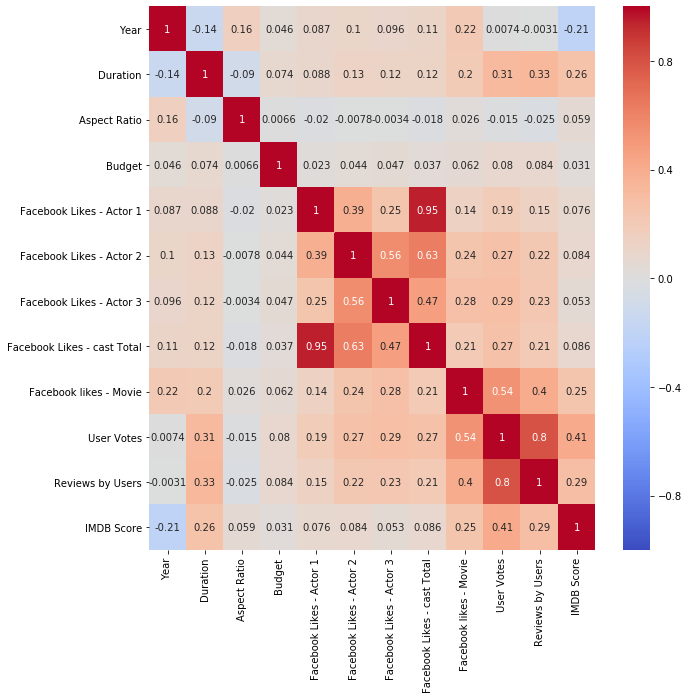

In [255]:
# create correlation heatmap matrix

plt.figure(figsize=(10,10))
sns.heatmap(movies_corr.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

# Question 3 
### How is duration and votes/scores related?